In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [2]:
import os
for dirname, _, filenames in os.walk('autism_detect_new'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

autism_detect_new\asd\asd_original_TS001_11.png_682a2ec5-001f-4d32-97b7-aedcb40b5a88.png
autism_detect_new\asd\asd_original_TS001_11.png_c01fa7f5-ef30-4597-a4e8-3075646459ff.png
autism_detect_new\asd\asd_original_TS001_11.png_c29c5332-2247-4177-a69c-c42e6f6fd266.png
autism_detect_new\asd\asd_original_TS001_11.png_ff92ee87-b531-46ae-a8e3-394cbeebb87c.png
autism_detect_new\asd\asd_original_TS002_11.png_2f76679a-0041-4bb6-bb66-7e9586dde87a.png
autism_detect_new\asd\asd_original_TS002_11.png_398fd447-2b45-4511-8b6d-54d6d2e9e6dc.png
autism_detect_new\asd\asd_original_TS002_11.png_46c869cd-e593-48db-b351-e64480a6d8ab.png
autism_detect_new\asd\asd_original_TS002_11.png_b68cca95-fba8-4589-953b-c6592a17d1b3.png
autism_detect_new\asd\asd_original_TS002_11.png_cfbf6d8b-9c90-4986-be53-9255ed668964.png
autism_detect_new\asd\asd_original_TS002_11.png_e79e3d41-a473-45fd-87c4-494b04fa29a8.png
autism_detect_new\asd\asd_original_TS002_11.png_fbf9b4db-bf36-44ba-8137-013c486cd304.png
autism_detect_new\asd

In [3]:
base_path = "autism_detect_new"
categories = ["asd", "non_asd"]

image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df

,image_path,label
0,autism_detect_new\asd\asd_original_TS001_11.pn...,asd
1,autism_detect_new\asd\asd_original_TS001_11.pn...,asd
2,autism_detect_new\asd\asd_original_TS001_11.pn...,asd
3,autism_detect_new\asd\asd_original_TS001_11.pn...,asd
4,autism_detect_new\asd\asd_original_TS002_11.pn...,asd
...,...,...
3934,autism_detect_new\non_asd\non_asd_original_TC3...,non_asd
3935,autism_detect_new\non_asd\non_asd_original_TC3...,non_asd
3936,autism_detect_new\non_asd\non_asd_original_TC3...,non_asd
3937,autism_detect_new\non_asd\non_asd_original_TC3...,non_asd


In [5]:
df.shape

(3939, 2)

In [6]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [9]:
df['label'].unique()

array(['asd', 'non_asd'], dtype=object)

In [10]:
df['label'].value_counts()

label
asd        1971
non_asd    1968
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_4752\3391831636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


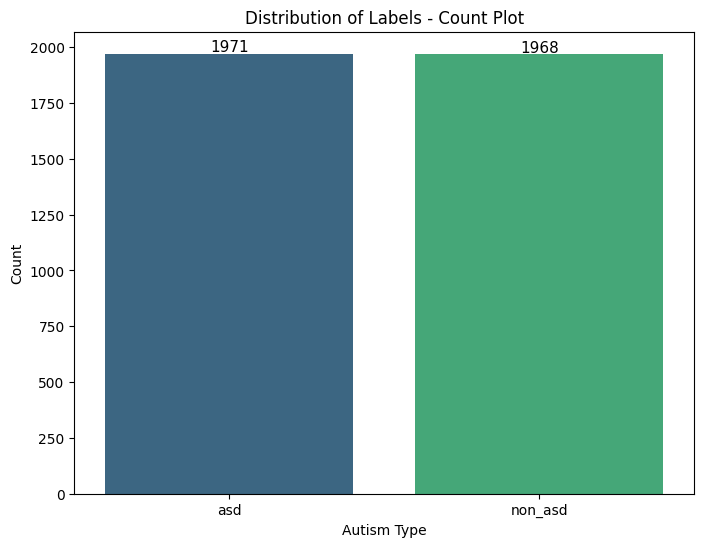

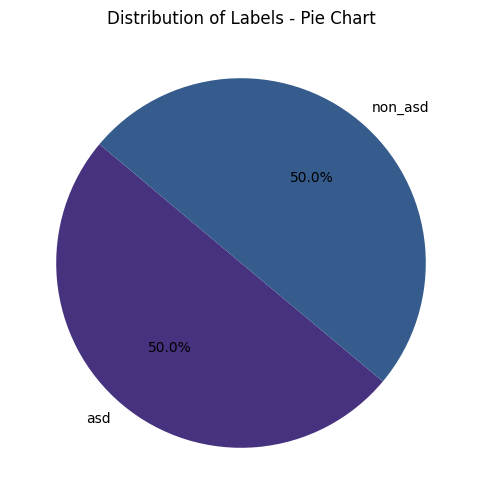

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Autism Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

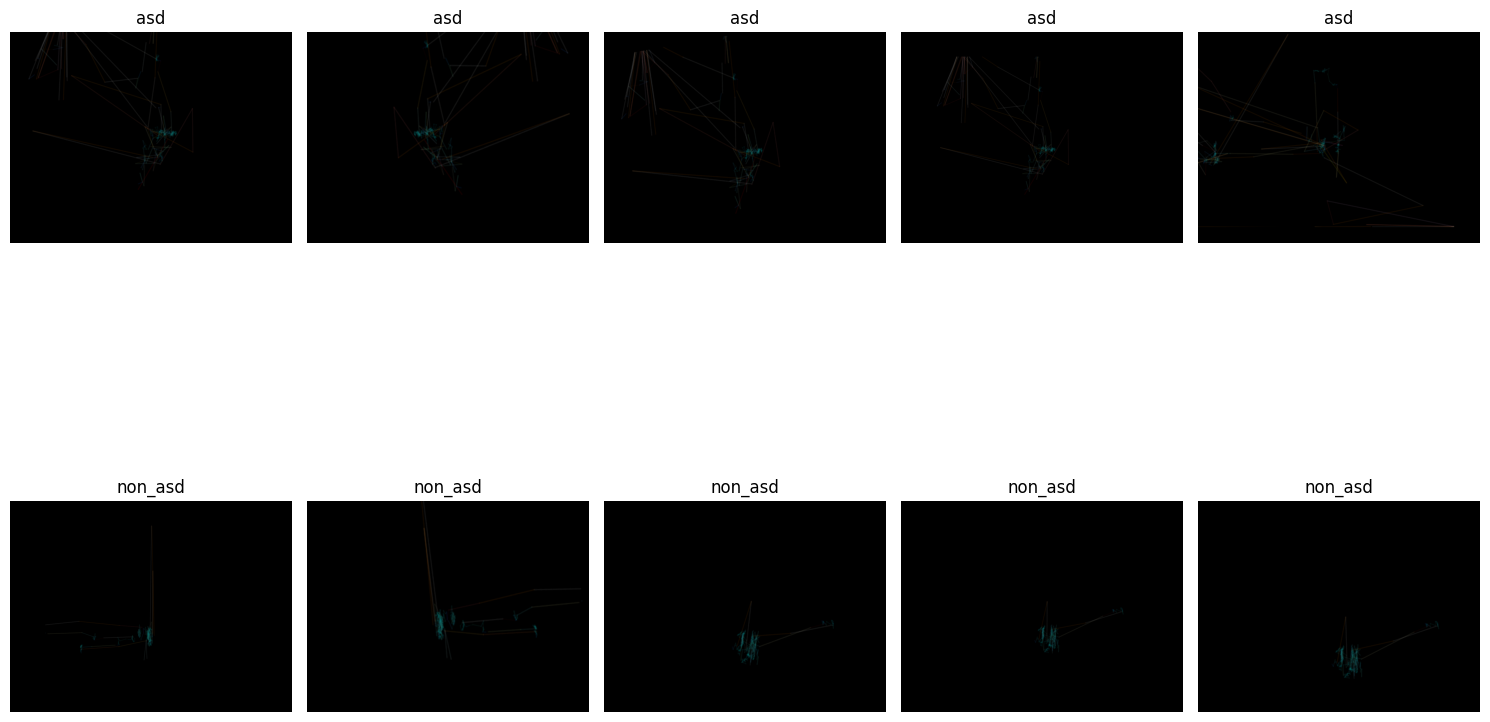

In [12]:
num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [13]:
label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [14]:
df = df[['image_path', 'category_encoded']]

In [15]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [16]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [17]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    1971
1    1971
Name: count, dtype: int64


In [18]:
df_resampled

,image_path,category_encoded
0,autism_detect_new\asd\asd_original_TS001_11.pn...,0
1,autism_detect_new\asd\asd_original_TS001_11.pn...,0
2,autism_detect_new\asd\asd_original_TS001_11.pn...,0
3,autism_detect_new\asd\asd_original_TS001_11.pn...,0
4,autism_detect_new\asd\asd_original_TS002_11.pn...,0
...,...,...
3937,autism_detect_new\non_asd\non_asd_original_TC3...,1
3938,autism_detect_new\non_asd\non_asd_original_TC3...,1
3939,autism_detect_new\non_asd\non_asd_original_TC2...,1
3940,autism_detect_new\non_asd\non_asd_original_TC2...,1


In [19]:
sns.set_style('darkgrid')

In [20]:
import warnings
warnings.filterwarnings("ignore")

print ('Check..........')

Check..........


In [21]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [22]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [23]:
batch_size = 16
img_size = (224, 224)
channels = 3 
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 3153 validated image filenames belonging to 2 classes.
Found 394 validated image filenames belonging to 2 classes.
Found 395 validated image filenames belonging to 2 classes.


In [24]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [26]:
class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
      
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_inception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [27]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 132s 586ms/step - accuracy: 0.6633 - loss: 0.6944 - val_accuracy: 0.6853 - val_loss: 0.6944
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 109s 549ms/step - accuracy: 0.7735 - loss: 0.4725 - val_accuracy: 0.7792 - val_loss: 0.4915
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 111s 560ms/step - accuracy: 0.8041 - loss: 0.4185 - val_accuracy: 0.7843 - val_loss: 0.4545
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 153s 772ms/step - accuracy: 0.8524 - loss: 0.3406 - val_accuracy: 0.8020 - val_loss: 0.4098
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 108s 546ms/step - accuracy: 0.8326 - loss: 0.3738 - val_accuracy: 0.6751 - val_loss: 0.8751


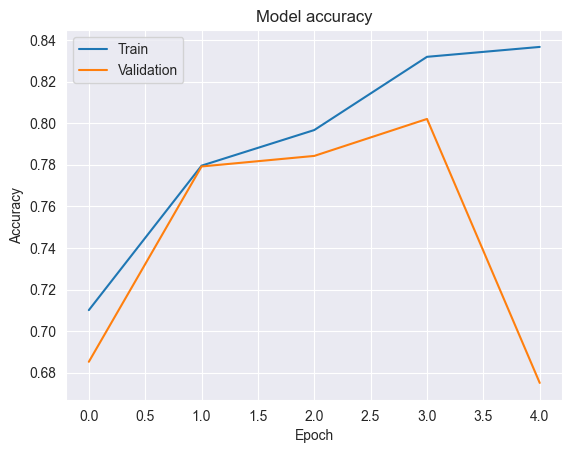

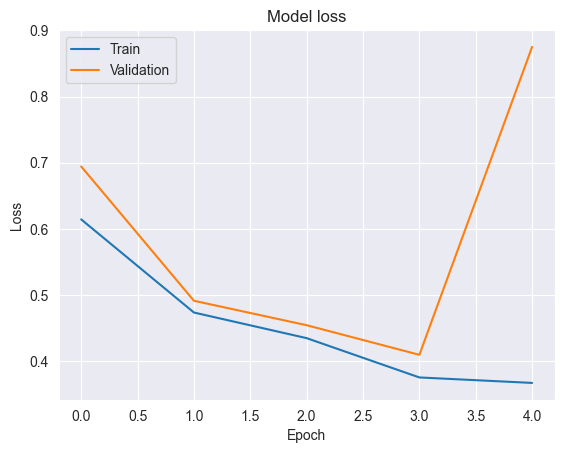

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 492ms/step


In [30]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       198
           1       0.84      0.85      0.85       197

    accuracy                           0.85       395
   macro avg       0.85      0.85      0.85       395
weighted avg       0.85      0.85      0.85       395



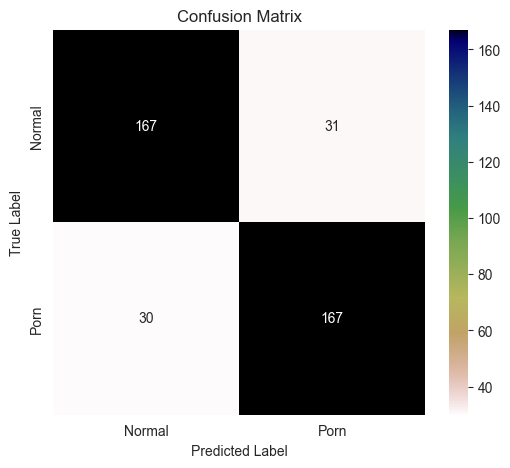

In [31]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gist_earth_r', xticklabels=['Normal', 'Porn'], yticklabels=['Normal', 'Porn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(1, activation='sigmoid')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [33]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.6776 - loss: 0.6899 - val_accuracy: 0.6624 - val_loss: 0.7342
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 182s 919ms/step - accuracy: 0.7769 - loss: 0.4666 - val_accuracy: 0.7284 - val_loss: 0.5458
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 180s 908ms/step - accuracy: 0.8022 - loss: 0.4446 - val_accuracy: 0.6726 - val_loss: 0.6270
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8220 - loss: 0.3854 - val_accuracy: 0.8477 - val_loss: 0.3780
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 180s 907ms/step - accuracy: 0.8295 - loss: 0.3571 - val_accuracy: 0.8198 - val_loss: 0.3794


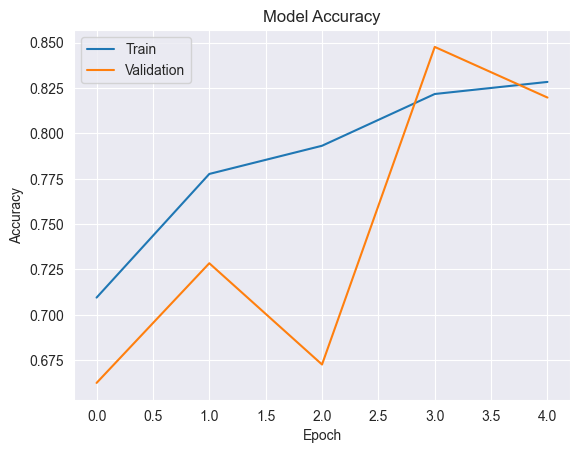

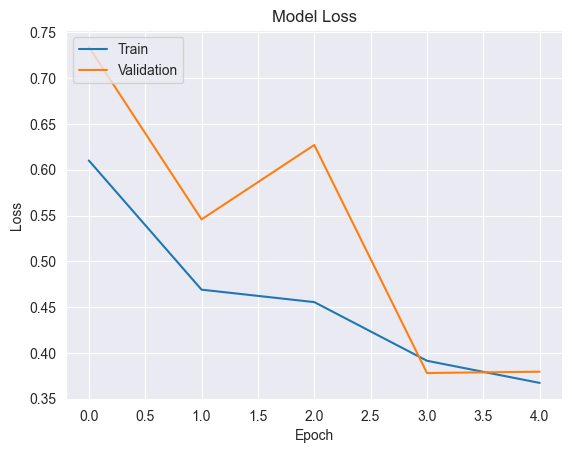

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 715ms/step


In [36]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       198
           1       0.89      0.71      0.79       197

    accuracy                           0.81       395
   macro avg       0.82      0.81      0.81       395
weighted avg       0.82      0.81      0.81       395



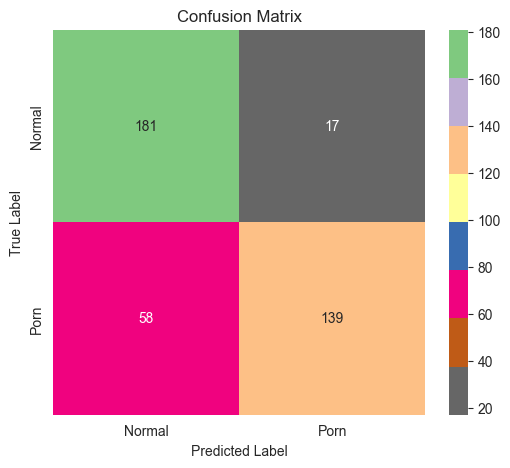

In [37]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Accent_r', xticklabels=['Normal', 'Porn'], yticklabels=['Normal', 'Porn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

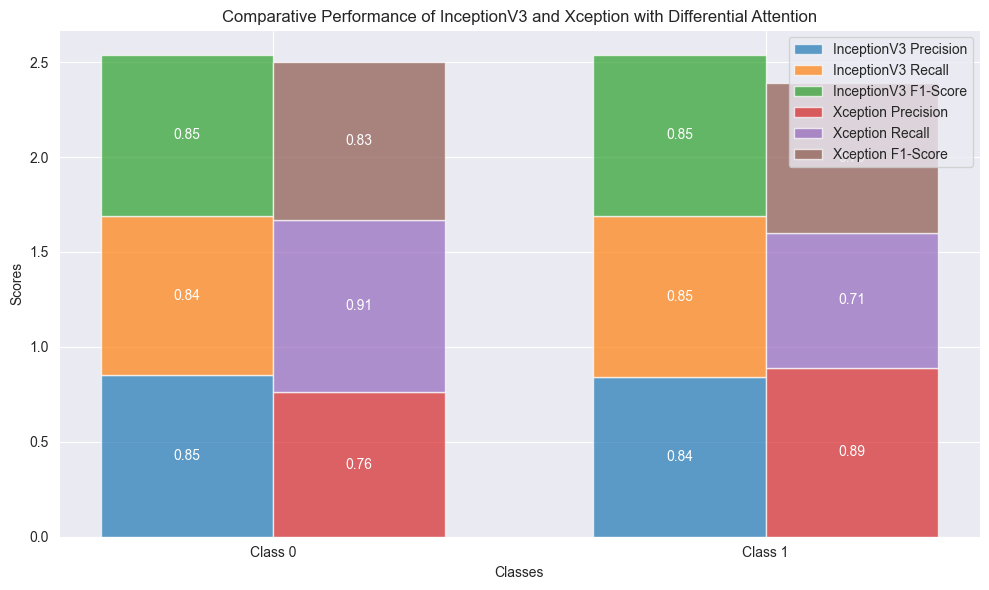

In [39]:
inception_metrics = {
    'Precision': [0.85, 0.84],
    'Recall': [0.84, 0.85],
    'F1-Score': [0.85, 0.85]
}

xception_metrics = {
    'Precision': [0.76, 0.89],
    'Recall': [0.91, 0.71],
    'F1-Score': [0.83, 0.79]
}

labels = ['Class 0', 'Class 1']

bar_width = 0.35

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, inception_metrics['Precision'], width=bar_width, label='InceptionV3 Precision', alpha=0.7)
ax.bar(x - bar_width/2, inception_metrics['Recall'], width=bar_width, label='InceptionV3 Recall', alpha=0.7, bottom=inception_metrics['Precision'])
ax.bar(x - bar_width/2, inception_metrics['F1-Score'], width=bar_width, label='InceptionV3 F1-Score', alpha=0.7, bottom=np.array(inception_metrics['Precision']) + np.array(inception_metrics['Recall']))

ax.bar(x + bar_width/2, xception_metrics['Precision'], width=bar_width, label='Xception Precision', alpha=0.7)
ax.bar(x + bar_width/2, xception_metrics['Recall'], width=bar_width, label='Xception Recall', alpha=0.7, bottom=xception_metrics['Precision'])
ax.bar(x + bar_width/2, xception_metrics['F1-Score'], width=bar_width, label='Xception F1-Score', alpha=0.7, bottom=np.array(xception_metrics['Precision']) + np.array(xception_metrics['Recall']))

for i in range(len(labels)):
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] / 2, f"{inception_metrics['Precision'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] + inception_metrics['Recall'][i] / 2, f"{inception_metrics['Recall'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i - bar_width/2, inception_metrics['Precision'][i] + inception_metrics['Recall'][i] + inception_metrics['F1-Score'][i] / 2, f"{inception_metrics['F1-Score'][i]:.2f}", ha='center', va='center', color='white')
    
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] / 2, f"{xception_metrics['Precision'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] + xception_metrics['Recall'][i] / 2, f"{xception_metrics['Recall'][i]:.2f}", ha='center', va='center', color='white')
    ax.text(i + bar_width/2, xception_metrics['Precision'][i] + xception_metrics['Recall'][i] + xception_metrics['F1-Score'][i] / 2, f"{xception_metrics['F1-Score'][i]:.2f}", ha='center', va='center', color='white')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparative Performance of InceptionV3 and Xception with Differential Attention')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()